In [2]:
#Importing libraries
import tensorflow as tf 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 


In [3]:
#DATA PREPROCESSING
#TRAINING IMAGE PREPROCESSING
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 37940 files belonging to 38 classes.


In [4]:
#VALIDATION IMAGE PREPROCESSING
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17477 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
#BUILDING MODEL
cnn = tf.keras.models.Sequential()

In [7]:
#BUILDING CONVOLUTION LAYER
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\Abi\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [13]:
#OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [14]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#MODEL TRAINING
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 1150s 2s/step - accuracy: 0.2717 - loss: 2.6315 - val_accuracy: 0.7027 - val_loss: 1.0060
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 1059s 2s/step - accuracy: 0.7189 - loss: 0.9208 - val_accuracy: 0.7881 - val_loss: 0.7084
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 1032s 2s/step - accuracy: 0.8229 - loss: 0.5643 - val_accuracy: 0.8535 - val_loss: 0.5009
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11111s 19s/step - accuracy: 0.8768 - loss: 0.3885 - val_accuracy: 0.8614 - val_loss: 0.4560
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 1023s 2s/step - accuracy: 0.9037 - loss: 0.3035 - val_accuracy: 0.9006 - val_loss: 0.3405
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 6252s 11s/step - accuracy: 0.9344 - loss: 0.2034 - val_accuracy: 0.9085 - val_loss: 0.3316
Epoch 7/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 1583s 3s/step - accuracy: 0.9460 - loss: 0.1641 - val_accuracy: 0.8927 - val_loss: 0.4282
Epoch 8/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 1463s 2s/step - accuracy: 0.9474 - loss: 0.1550

In [16]:
#TRAINING SET ACCURACY
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

593/593 ━━━━━━━━━━━━━━━━━━━━ 200s 337ms/step - accuracy: 0.9854 - loss: 0.0469
Training accuracy: 0.9867158532142639


In [17]:
#VALIDATION SET ACCURACY
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

274/274 ━━━━━━━━━━━━━━━━━━━━ 94s 343ms/step - accuracy: 0.9291 - loss: 0.2763
Validation accuracy: 0.9263031482696533


In [18]:
#SAVING MODEL
cnn.save('trained_plant_disease_model.keras')
#TRAINING HISTORY
training_history.history

{'accuracy': [0.4527938961982727,
  0.7470216155052185,
  0.8376383781433105,
  0.882551372051239,
  0.9125988483428955,
  0.934343695640564,
  0.9486557841300964,
  0.953347384929657,
  0.9632841348648071,
  0.9681338667869568],
 'loss': [1.8895708322525024,
  0.8244351148605347,
  0.5176494121551514,
  0.36732327938079834,
  0.27346858382225037,
  0.20278266072273254,
  0.15533757209777832,
  0.1388082653284073,
  0.11141294986009598,
  0.09697196632623672],
 'val_accuracy': [0.7026949524879456,
  0.7880643010139465,
  0.8535217642784119,
  0.8614178895950317,
  0.9006122350692749,
  0.9084510803222656,
  0.8926589488983154,
  0.9056473970413208,
  0.9196086525917053,
  0.9263031482696533],
 'val_loss': [1.0060044527053833,
  0.7083770632743835,
  0.5009480118751526,
  0.45602214336395264,
  0.34046533703804016,
  0.33161047101020813,
  0.4281567633152008,
  0.35270899534225464,
  0.2792120575904846,
  0.28055381774902344]}

In [19]:
#RECORDING HISTORY IN JSON
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


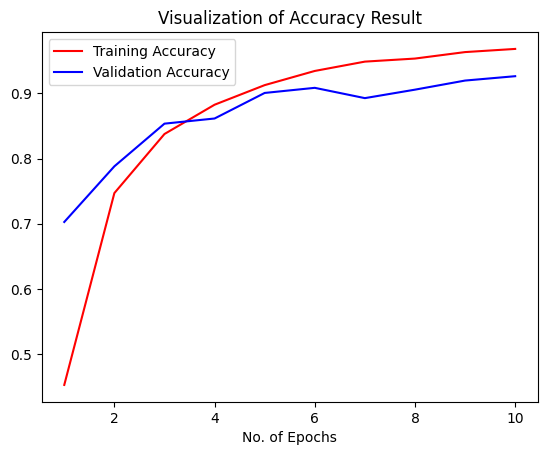

In [21]:
#ACCURACY VISUALIZATION
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [22]:
#CONFUSION MATRIX FOR MODEL VISUALIZATION
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

Found 17477 files belonging to 38 classes.
17477/17477 ━━━━━━━━━━━━━━━━━━━━ 350s 20ms/step


In [23]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [24]:

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [25]:

# PRECISION RECALL F-SCORE
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.84      0.88       504
                                 Apple___Black_rot       0.97      0.96      0.96       497
                          Apple___Cedar_apple_rust       0.94      0.93      0.94       440
                                   Apple___healthy       0.88      0.93      0.91       502
                               Blueberry___healthy       0.96      0.90      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.97      0.95       421
                 Cherry_(including_sour)___healthy       0.91      0.99      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.88      0.88       315
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.92      0.

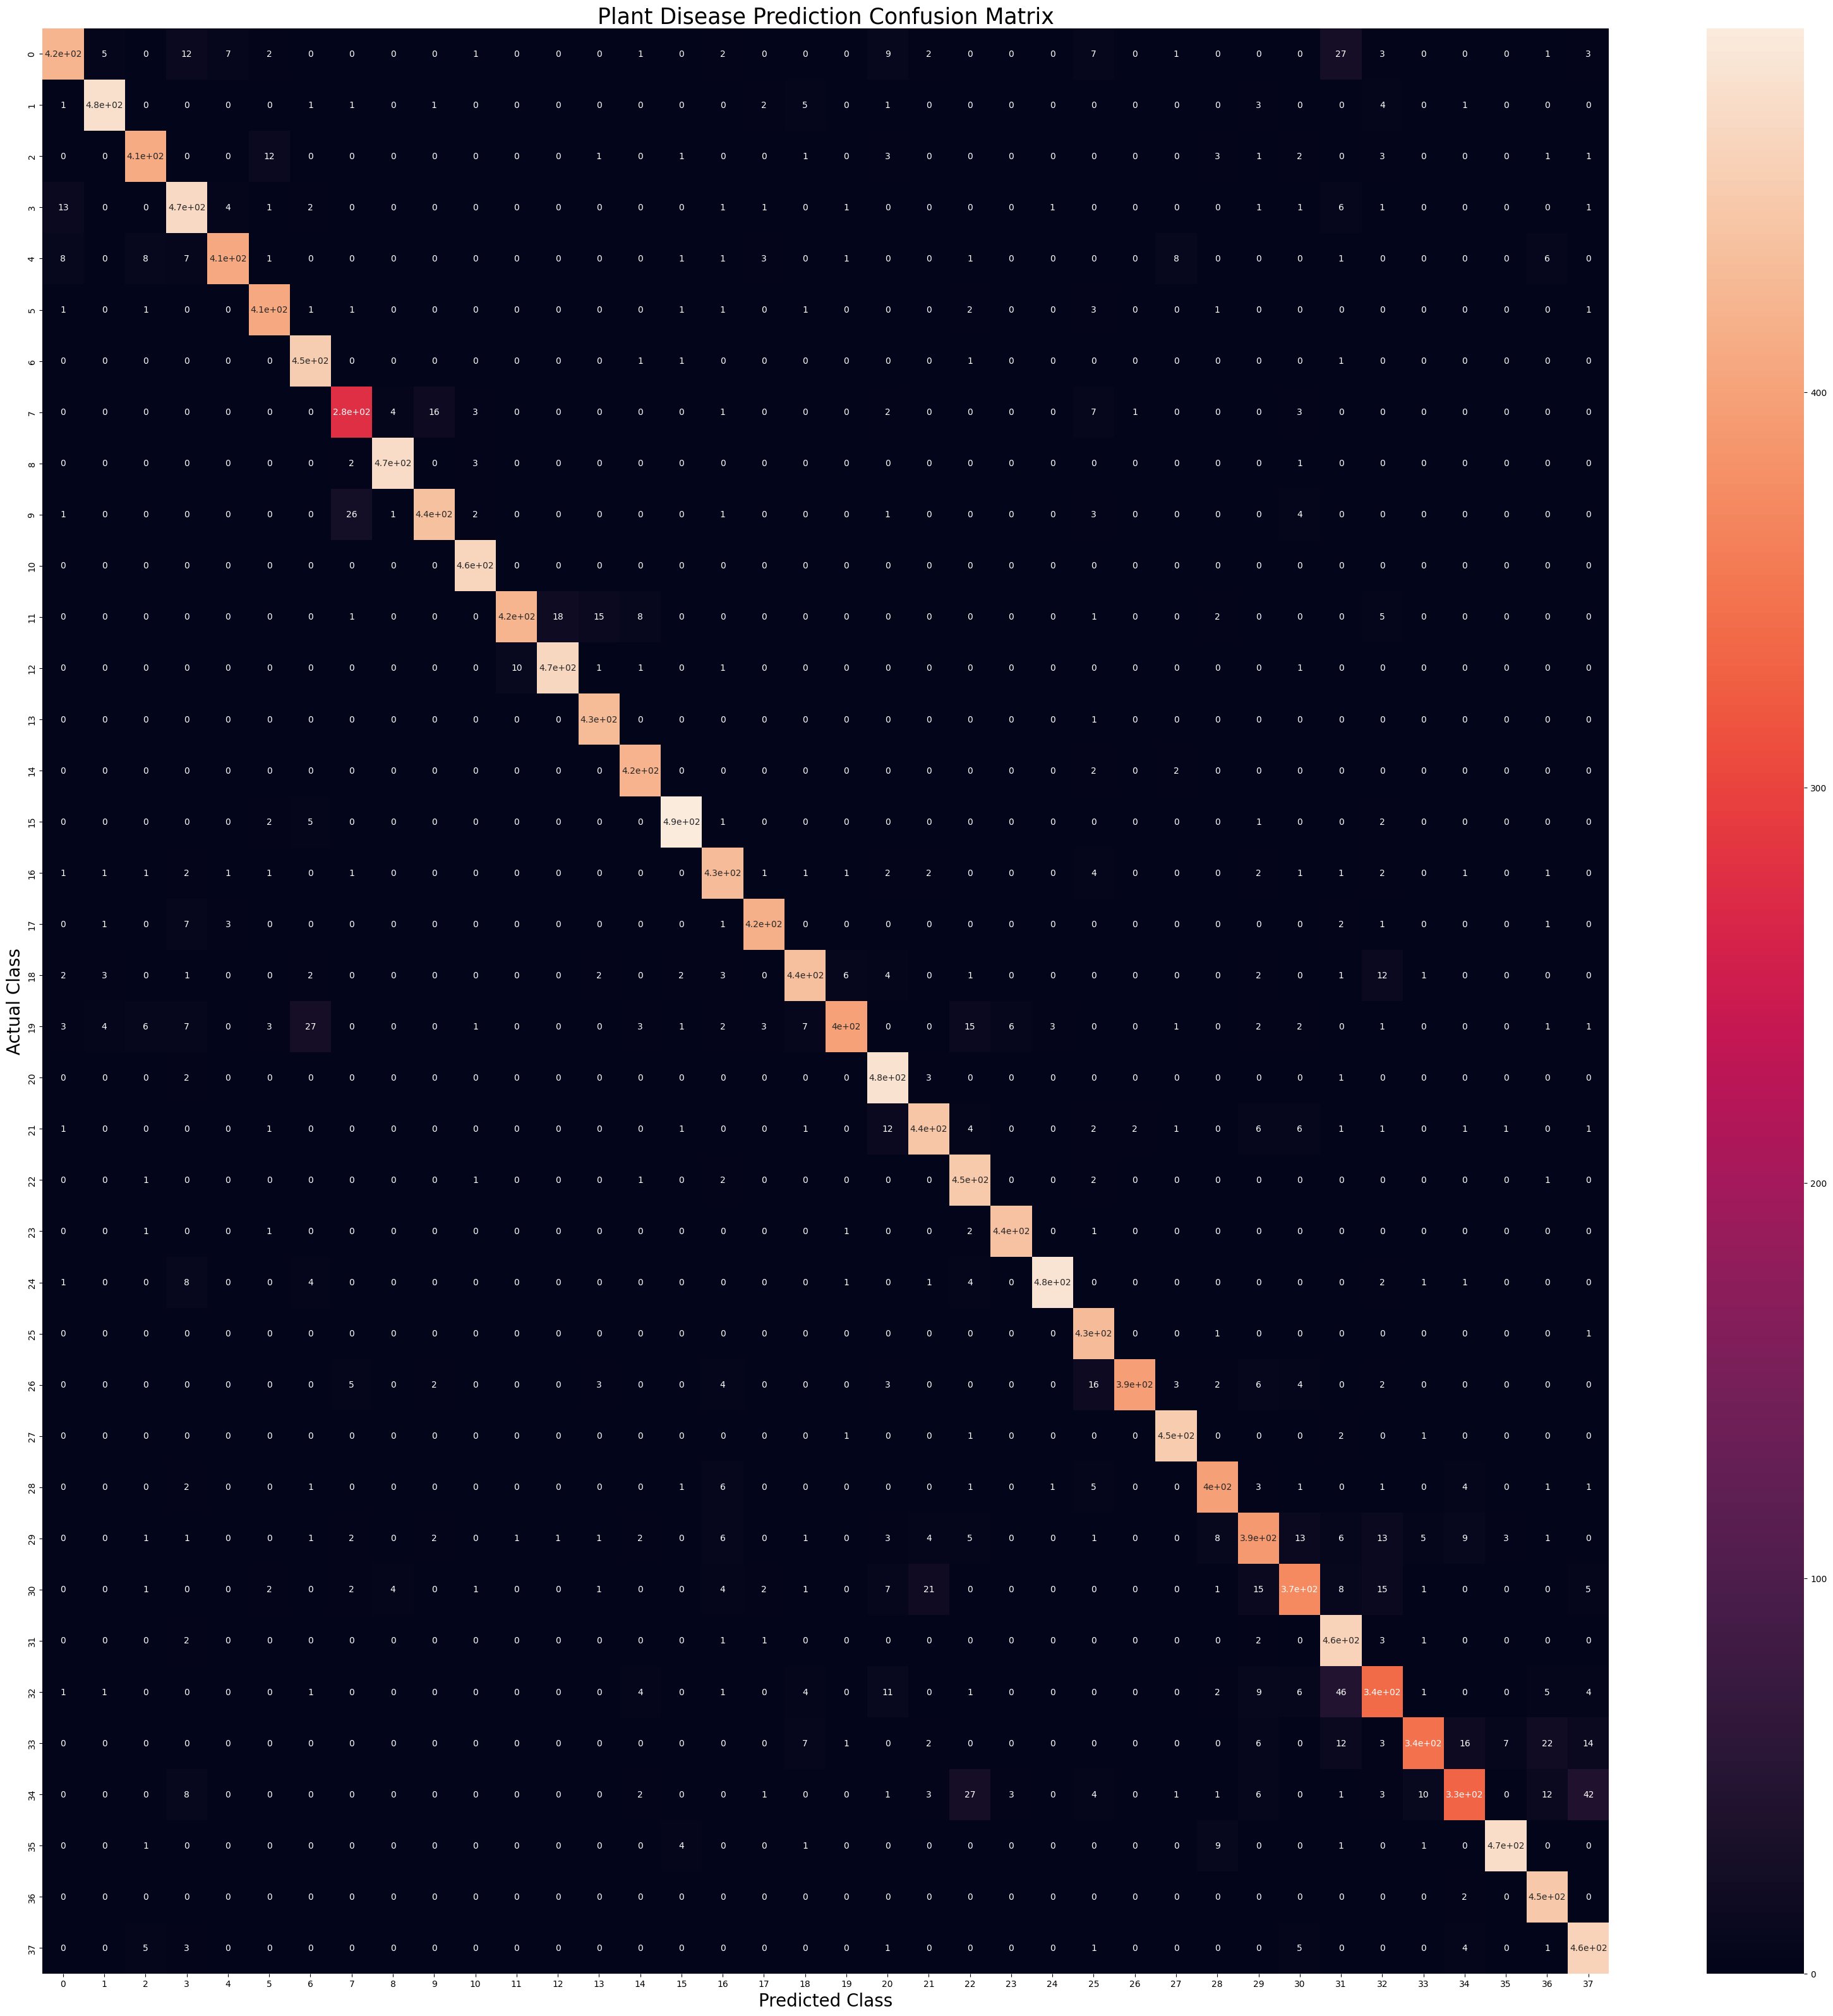

In [26]:
#CONFUSION MATRIX VISUALIZATION

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard


In [6]:
tensorboard_callback = TensorBoard(log_dir=r'G:\Projects\Plants Disease Prediction\train\Apple___Apple_scab')
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10, callbacks=[tensorboard_callback])


NameError: name 'cnn' is not defined